In [1]:
!rm ./* -rf
!git clone https://github.com/Neocryan/network-analysis.git
!mv network-analysis/* ./
# !pip install networkx==1.11
!pip install -U networkx

Cloning into 'network-analysis'...
remote: Counting objects: 34, done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.
Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages
Requirement already up-to-date: decorator>=4.1.0 in /usr/local/lib/python3.6/dist-packages (from networkx)


In [6]:
import networkx as nx
import numpy as np
from save_n_load import load
from pprint import pprint
id2geo,group2stop,stop2group,name2id,id2name,edge_tuple = load()

load it


Plot the core


In [0]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key="AI")
# from gmaps import 

# fig = gmaps.figure()
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '0 auto 0 auto',
    'padding': '1px'
}
fig= gmaps.figure(layout=figure_layout)

xxx = plot_core4
heatmap_layer = gmaps.heatmap_layer(
    xxx,max_intensity=10000, point_radius=1.0
)
fig.add_layer(heatmap_layer)
fig.add_layer(gmaps.transit_layer())
polygon = gmaps.Polygon(
    xxx
)
drawing = gmaps.drawing_layer(
    features=[polygon],
    show_controls=False
)



In [0]:
# LOAD Graph HERE
GG = nx.read_gpickle('net100')

In [8]:
nx.info(GG)

'Name: \nType: Graph\nNumber of nodes: 5486\nNumber of edges: 10246\nAverage degree:   3.7353'

In [14]:
GG_noself = GG.copy()
GG_noself.remove_edges_from(nx.selfloop_edges(GG_noself))
core_dict = nx.core_number(GG_noself)
print('all {} cores'.format(len(set(core_dict.values()))))

all 4 cores


In [0]:
plot_core1 = []
for j in [x for x in nx.k_core(GG_noself,k=4)]:
    plot_core1.append(id2geo[group2stop[int(j.replace("'",""))][0]])
plot_core2 = []
for j in [x for x in nx.k_core(GG_noself,k=3)]:
    plot_core2.append(id2geo[group2stop[int(j.replace("'",""))][0]])
plot_core3 = []
for j in [x for x in nx.k_core(GG_noself,k=2)]:
    plot_core3.append(id2geo[group2stop[int(j.replace("'",""))][0]])
plot_core4 = []
for j in [x for x in nx.k_core(GG_noself,k=1)]:
    plot_core4.append(id2geo[group2stop[int(j.replace("'",""))][0]])


In [0]:
core1 = []
for j in [x for x in nx.k_core(GG_noself,k=4)]:
    core1.append(j)
core2 = []
for j in [x for x in nx.k_core(GG_noself,k=3)]:
    core2.append(j)
core3 = []
for j in [x for x in nx.k_core(GG_noself,k=2)]:
    core3.append(j)
core4 = []
for j in [x for x in nx.k_core(GG_noself,k=1)]:
    core4.append(j)

In [24]:

core4 = [x for x in core4 if x not in core3]
core3 = [x for x in core3 if x not in core2]
core2 = [x for x in core2 if x not in core1]
len(core1),len(core2),len(core3),len(core4)

(59, 1942, 3359, 126)

In [0]:
decen = nx.degree_centrality(GG)

In [0]:
yy = []
for i in sorted(decen,key=lambda x: decen[x],reverse= True):
    yy.append(decen[i])

In [0]:
xx = [x.replace("'",'') for x in sorted(decen,key=lambda x: decen[x],reverse= True)]

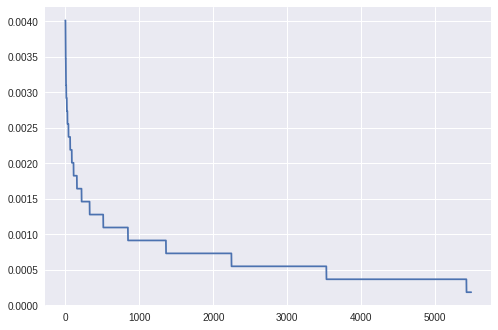

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(yy)

In [0]:
bcen = nx.betweenness_centrality(GG)

In [0]:
yy_b = []
for i in sorted(bcen,key=lambda x: bcen[x],reverse= True):
    yy_b.append(bcen[i])

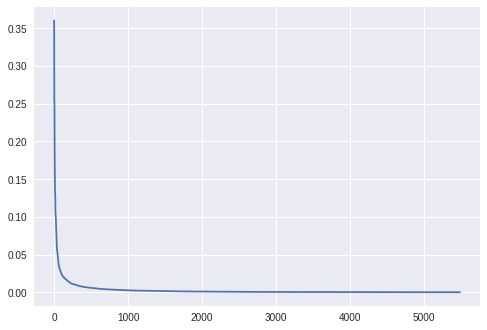

In [0]:
plt.plot((yy_b))

In [0]:
xc = sorted(bcen,key=lambda x: bcen[x],reverse= True)
for i in range(10):
    print(id2name[group2stop[int(xx[i])][0]])
print('-'*10)
# xc = sorted(decen,key=lambda x: decen[x],reverse= True)
for i in range(10):
    print(id2name[group2stop[int(xx[-(i+1)])][0]])

Nation
Charles de Gaulle-Etoile
Châtelet
Denfert-Rochereau
PORTE D'AUBERVILLIERS - OBERLE
Place d'Italie
Nanterre-Ville
Opéra
Porte de Saint-Cloud
Gare de l'Est (Verdun)
----------
VAN GOGH
PLACE DU VEL'D'HIV
PLACE DE L'ECLUSE
ATELIERS RATP
PABLO PICASSO
MAISON DE QUARTIER
FLEURY - TRICOTS
MONASTERE
LA GALAISE
PRES SAINT-MARTIN


In [0]:
# nx.write_gpickle(GG,'net100')
# nx.write_gpickle(G,'net0')

## Remove nodes and shortest path

This two funtion make the int to the format that fit the graph node name(wrap)

Or make the graph node name to int(unwrap)

In [0]:
def wrap(x):
    return "'{}'".format(x)
def unwrap(x):
    return int(x.replace("'",''))
  
def nametogroup(name = 'Châtelet'):
    return stop2group[name2id[name.lower()][0]]

In [17]:
## EG

print(wrap(100))
print('-'*10)
print(unwrap("'100'"))
print('-'*10)
nametogroup('CITE UNIVERSITAIRE')

'100'
----------
100
----------


2102

In [0]:
# input is stop id which can use dict name2id to find
def find_short_path(start_id = 2140,end_id = 1924,graph = GG,verbose = True):
    id1 = stop2group[start_id]
    id2 = stop2group[end_id]
    short_p = nx.shortest_path(graph,source=wrap(id1),target = wrap(id2))
    print('the shortest path between {} and {} is {} stations long'\
          .format(id2name[start_id],id2name[end_id],len(short_p)))
    if verbose:
        pprint(list(id2name[group2stop[unwrap(x)][0]] for x in short_p))
    return len(short_p)

In [19]:
find_short_path(3764835,)

the shortest path between CITE UNIVERSITAIRE and Le Guichet is 7 stations long
['CITE UNIVERSITAIRE',
 'GLACIERE - TOLBIAC',
 'ALESIA - RENE COTY',
 'JOURDAN-MONTSOURIS',
 "Porte d'Orléans (Général Leclerc)",
 'Massy-Palaiseau',
 'Le Guichet']


7

In [9]:
find_short_path(3764835,2140)

the shortest path between CITE UNIVERSITAIRE and Cergy-Préfecture is 18 stations long
['CITE UNIVERSITAIRE',
 'PARC MONTSOURIS',
 'DAREAU - SAINT-JACQUES',
 'Denfert-Rochereau',
 'Montparnasse-Bienvenue',
 'Saint-Michel Notre-Dame',
 'Les Halles',
 'Opéra',
 'Charles de Gaulle-Etoile',
 'La Défense (Grande Arche)',
 'Nanterre-Préfecture',
 'Houilles Carrières-sur-Seine',
 'Sartrouville',
 'Maisons-Laffitte',
 'Achères-Ville',
 "Conflans-Fin d'Oise",
 'Neuville-Université',
 'Cergy-Préfecture']


18

In [0]:
def attack_group_target(group = [2102]):
    gp = [wrap(x) for x in group]
    G1 = GG.copy()
    G1.remove_nodes_from(gp)
    pprint('remove {}'.format([id2name[group2stop[x][0]] for x in group]))
    return G1

In [0]:
G1 = attack_group_target([190, 6,23,159])

In [21]:
nametogroup('LA DEFENSE'),nametogroup('NANTERRE - UNIVERSITE RER'),nametogroup('CITE UNIVERSITAIRE')

(2742, 3254, 2102)

In [19]:
for i in [[],[190],[190,6],[2742],[3254],[2102],[190, 6,159]]:
    G1 = attack_group_target(i)
    try:
        find_short_path(graph = G1,verbose = False)
    except nx.NetworkXNoPath as e:
        print(e)

'remove []'
the shortest path between Cergy-Préfecture and Le Guichet is 18 stations long
"remove ['Les Halles']"
the shortest path between Cergy-Préfecture and Le Guichet is 19 stations long
"remove ['Les Halles', 'Châtelet']"
the shortest path between Cergy-Préfecture and Le Guichet is 19 stations long
"remove ['LA DEFENSE']"
the shortest path between Cergy-Préfecture and Le Guichet is 18 stations long
"remove ['NANTERRE - UNIVERSITE RER']"
the shortest path between Cergy-Préfecture and Le Guichet is 18 stations long
"remove ['CITE UNIVERSITAIRE']"
the shortest path between Cergy-Préfecture and Le Guichet is 18 stations long
"remove ['Les Halles', 'Châtelet', 'Massy-Palaiseau']"
No path between '304' and '240'.


In [0]:
G1 = attack_group_target([2742,214,103])
find_short_path(graph = G1,verbose = True)

In [0]:
Gc = nx.read_gpickle('combined.gpickle')

In [0]:
Gc.edges(data = True)

In [0]:
id2namec = {}
name2idc = {}
for i in Gc.node:
  id2namec[i] =Gc.node[i]['name']
  name2idc[Gc.node[i]['name']] =  name2idc.get(Gc.node[i]['name'],[]) + [i]
  


In [14]:
[id2namec[x] for x in nx.shortest_path(Gc,27475,27404, weight='duration_avg')]

['CERGY PREFECTURE',
 'NEUVILLE UNIVERSITE',
 "CONFLANS FIN D'OISE",
 'ACHERES VILLE',
 'MAISONS LAFFITTE',
 'SARTROUVILLE',
 'NANTERRE PREFECTURE',
 'LA DEFENSE',
 'CHARLES DE GAULLE ETOILE',
 'AUBER',
 'CHATELET LES HALLES',
 'ST MICHEL ND RER B',
 'LUXEMBOURG',
 'PORT ROYAL',
 'DENFERT ROCHEREAU',
 'CITE UNIVERSITAIRE',
 'BOURG LA REINE',
 'ANTONY',
 'MASSY PALAISEAU',
 'PALAISEAU',
 'PALAISEAU VILLEBON',
 'LOZERE',
 'LE GUICHET']

In [17]:
G0 = Gc.copy()
G0.remove_nodes_from([27051,9997,9998])
[id2namec[x] for x in nx.shortest_path(G0,27475,27404, weight='duration_avg')],nx.dijkstra_path_length(G0,27404,27475, weight='duration_avg'),nx.dijkstra_path_length(Gc,27404,27475, weight='duration_avg')

(['CERGY PREFECTURE',
  'NEUVILLE UNIVERSITE',
  "CONFLANS FIN D'OISE",
  'CONFLANS SAINTE-HONORINE',
  'PONTOISE',
  "SAINT-OUEN L'AUMONE",
  "SAINT-OUEN L'AUMONE LIESSE",
  'PIERRELAYE',
  'MONTIGNY BEAUCHAMP',
  'FRANCONVILLE LE PLESSIS BOUCHARD',
  'CERNAY',
  'ERMONT EAUBONNE',
  'ENGHIEN LES BAINS',
  'EPINAY VILLETANEUSE',
  'SAINT-DENIS',
  'STADE DE FRANCE SAINT-DENIS',
  'PARIS NORD',
  'CHATELET LES HALLES',
  'ST MICHEL ND RER B',
  'LUXEMBOURG',
  'PORT ROYAL',
  'DENFERT ROCHEREAU',
  'CITE UNIVERSITAIRE',
  'BOURG LA REINE',
  'ANTONY',
  'MASSY PALAISEAU',
  'PALAISEAU',
  'PALAISEAU VILLEBON',
  'LOZERE',
  'LE GUICHET'],
 4961.911064087815,
 3826.868477235522)

In [0]:
def remove_n_percent(graph, percent,nodes_list = None):
  graph_copy = nx.Graph.copy(graph)
  if nodes_list is None:
    nodes_list = np.array(graph.nodes())
  remove_list = np.random.choice(nodes_list,int(nodes_list.shape[0] * percent))
  graph_copy.remove_nodes_from(remove_list)
  return graph_copy

In [0]:
def other_mean(ac):
  sorted_other = sorted(nx.connected_component_subgraphs(ac),key = len)[1:]
  other_array = np.array([i for i in map(lambda x: nx.number_of_nodes(x) , sorted_other)])
  return other_array.mean()

In [0]:

gcc_size_random = []
other_size_random = []
gcc_size_target = []
other_size_target = []
dia = []
total_nodes = nx.number_of_nodes(G1)
for i in range(20):
  percent = (i+1)/100
  random_remove1 = remove_n_percent(G1,percent)
  gcc= max(nx.connected_component_subgraphs(random_remove1), key = len) 
  gcc_random_size1 = nx.number_of_nodes(gcc)
#   other_size_random1 = other_mean(random_remove1)
#   dia.append(nx.diameter(gcc))
  gcc_size_random.append(gcc_random_size1)
#   other_size_random.append(other_size_random1)

gcc_size_random1 = []
gcc_size_target1 = []
dia1 = []
total_nodes = nx.number_of_nodes(G1)
for i in range(20):
  percent = (i+1)/100
  random_remove1 = remove_n_percent(G1,percent)
  gcc= max(nx.connected_component_subgraphs(random_remove1), key = len) 
  gcc_random_size1 = nx.number_of_nodes(gcc)
#   other_size_random1 = other_mean(random_remove1)
#   dia.append1(nx.diameter(gcc))
  gcc_size_random1.append(gcc_random_size1)
#   other_size_random.append(other_size_random1)



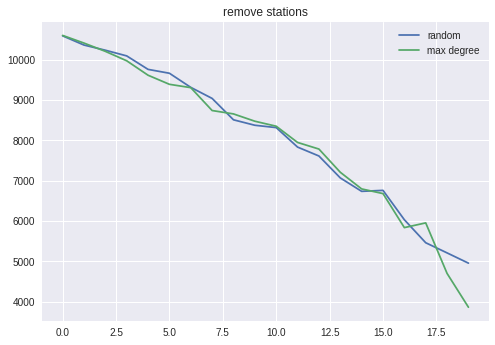

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = ax.twinx()
ax.plot(gcc_size_random,label = 'random')
ax.plot(gcc_size_random1,label = 'max degree')
ax.set_title('remove stations')
ax.legend()

In [0]:
def target_remove(graph,percent,nodes_list = None):
  copy = nx.Graph.copy(graph)
  if nodes_list is None:
    sorted_nodes_dict = sorted(np.array(copy.degree), key = lambda x: x[-1], reverse= True)
    nodes_list = [x for x in map(lambda x: x[0], sorted_nodes_dict)]
  
  n = len(nodes_list)
  remove_list = nodes_list[:int(n*percent)]
  copy.remove_nodes_from(remove_list)
  return copy

def remove_n_percent(graph, percent,nodes_list = None):
  graph_copy = nx.Graph.copy(graph)
  if nodes_list is None:
    nodes_list = np.array(graph.nodes())
  remove_list = np.random.choice(nodes_list,int(nodes_list.shape[0] * percent))
  graph_copy.remove_nodes_from(remove_list)
  return graph_copy

def core3_remove(graph, percent):
  graph_copy = nx.Graph.copy(graph)
  nodes_list = np.array(graph.nodes())
  remove_list = np.random.choice(core3,int(nodes_list.shape[0] * percent))
  graph_copy.remove_nodes_from(remove_list)
  return graph_copy

In [0]:
G1 = GG
gcc_size_random = []
gcc_size_target = []
gcc_size_core = []
for i in range(20):
  percent = (i+1)/100
  random_remove = remove_n_percent(G1,percent)
  gcc= max(nx.connected_component_subgraphs(random_remove), key = len) 
  gcc_random_size = nx.number_of_nodes(gcc)
  gcc_size_random.append(gcc_random_size)

  t_remove = target_remove(G1,percent)
  gcct= max(nx.connected_component_subgraphs(t_remove), key = len) 
  gcc_t_size = nx.number_of_nodes(gcct)
  gcc_size_target.append(gcc_t_size)
  
  c_remove = core3_remove(G1,percent)
  gccc= max(nx.connected_component_subgraphs(c_remove), key = len) 
  gcc_c_size = nx.number_of_nodes(gccc)
  gcc_size_core.append(gcc_c_size)

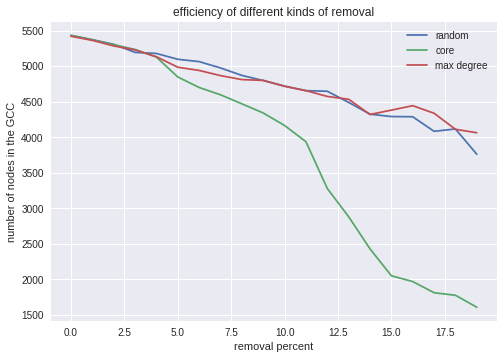

In [40]:
import matplotlib.pyplot as plt
plt.plot(gcc_size_random,label = 'random')
plt.plot(gcc_size_target,label = 'core')
plt.plot(gcc_size_core,label = 'max degree')
plt.legend()
plt.title('efficiency of different kinds of removal')
plt.xlabel('removal percent')
plt.ylabel('number of nodes in the GCC')
plt.show()

In [0]:
G1 = nx.read_gpickle('net100')
gcc_size_random = []
other_size_random = []
gcc_size_target = []
other_size_target = []
dia = []
total_nodes = nx.number_of_nodes(G1)
for i in range(20):
  percent = (i+1)/100
  random_remove1 = remove_n_percent(G1,percent)
  gcc= max(nx.connected_component_subgraphs(random_remove1), key = len) 
  gcc_random_size1 = nx.number_of_nodes(gcc)
#   other_size_random1 = other_mean(random_remove1)
#   dia.append(nx.diameter(gcc))
  gcc_size_random.append(gcc_random_size1)
#   other_size_random.append(other_size_random1)

gcc_size_random1 = []
gcc_size_target1 = []
dia1 = []
total_nodes = nx.number_of_nodes(G1)
for i in range(20):
  percent = (i+1)/100
  random_remove1 = remove_n_percent(G1,percent)
  gcc= max(nx.connected_component_subgraphs(random_remove1), key = len) 
  gcc_random_size1 = nx.number_of_nodes(gcc)
#   other_size_random1 = other_mean(random_remove1)
#   dia.append1(nx.diameter(gcc))
  gcc_size_random1.append(gcc_random_size1)
#   other_size_random.append(other_size_random1)



In [0]:
G1 = nx.read_gpickle('net100')

In [9]:
nx.number_of_edges(G1),nx.number_of_nodes(G1)

(10246, 5486)

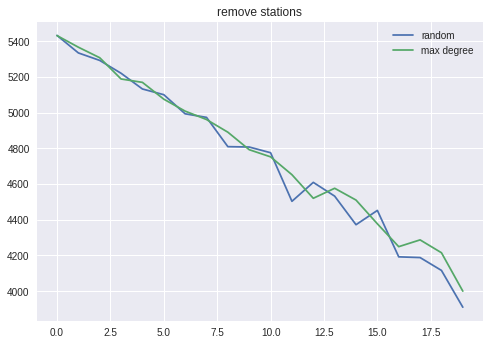

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = ax.twinx()
ax.plot(gcc_size_random,label = 'random')
ax.plot(gcc_size_random1,label = 'max degree')
ax.set_title('remove stations')
ax.legend()